In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler

In [5]:
data_train = pd.read_csv('Hyderabad_Power_Train.csv')
# data_test = pd.read_csv('Hyderabad_Power_Test.csv')

data_train.rename(columns = {'Wind Speed':'WindSpeed'}, inplace = True)
data_train.rename(columns = {'diffuse flows':'diffuseflows'}, inplace = True)
data_train.rename(columns = {'general diffuse flows':'generaldiffuseflows'}, inplace = True)

In [6]:
# sns.pairplot(data_train);

In [7]:
# data_train.corr().style.background_gradient(cmap='coolwarm')

# Temperature

16.322932885300617
0


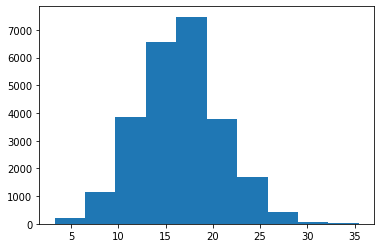

In [8]:
mean_value=data_train['Temperature'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['Temperature'].fillna(mean_value, inplace=True)
print(data_train['Temperature'].isna().sum())

plt.hist(data_train['Temperature'])
plt.show()

# Humidity

69.85919402473998
0


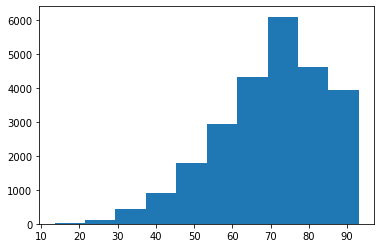

In [9]:
mean_value=data_train['Humidity'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['Humidity'].fillna(mean_value, inplace=True)
print(data_train['Humidity'].isna().sum())

plt.hist(data_train['Humidity'])
plt.show()

# Wind Speed

0.082
0


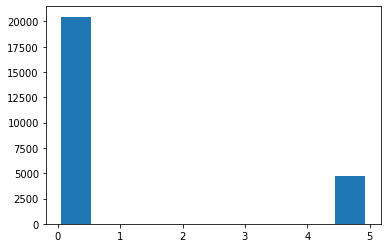

In [10]:
median_value=data_train['WindSpeed'].dropna().median()
print(median_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['WindSpeed'].fillna(median_value, inplace=True)
print(data_train['WindSpeed'].isna().sum())

plt.hist(data_train['WindSpeed'])
plt.show()

# general diffuse flows

185.74888827215756
0


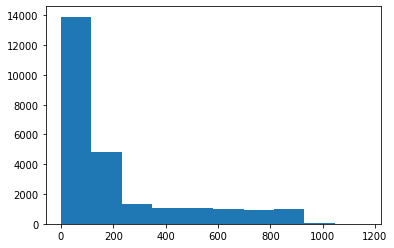

In [11]:
mean_value=data_train['generaldiffuseflows'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['generaldiffuseflows'].fillna(mean_value, inplace=True)
print(data_train['generaldiffuseflows'].isna().sum())

plt.hist(data_train['generaldiffuseflows'])
plt.show()

# Diffuse flows

93.80184791847354
0


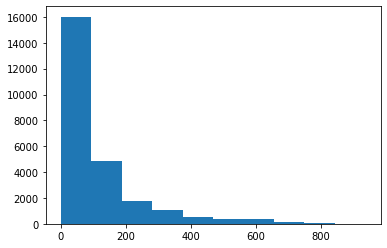

In [12]:
mean_value=data_train['diffuseflows'].dropna().mean()
print(mean_value)
# print(data_train['Temperature'].quantile([0.25,0.5,0.99]))

data_train['diffuseflows'].fillna(mean_value, inplace=True)
print(data_train['diffuseflows'].isna().sum())

plt.hist(data_train['diffuseflows'])
plt.show()

In [13]:
X = data_train.iloc[:, 1:6]
y = data_train.iloc[:, 6]

In [14]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape
print(list(X_train))
print(list(y_train))

['Temperature', 'Humidity', 'WindSpeed', 'generaldiffuseflows', 'diffuseflows']
[33580.36598, 38980.7535, 33319.95694, 35331.64557, 32055.09934, 23434.17219, 32218.22951, 37288.10127, 25569.68784, 43560.0, 30643.70861, 38234.70199, 37067.79661, 23432.17021, 30257.05059, 26930.36066, 34750.72848, 38715.94937, 34448.39612, 26237.28814, 25227.01987, 34584.51064, 32551.13025, 28496.18945, 34492.88136, 33212.85246, 25300.25316, 39531.65563, 22770.38298, 30319.65957, 43455.18987, 32856.51064, 29385.44262, 24054.68354, 33419.16039, 29624.65574, 23720.17021, 31557.44681, 22032.78689, 31986.38298, 29292.1519, 25099.86755, 42607.87944, 24872.17021, 24701.6577, 37275.69429, 33865.57589, 31425.04918, 33551.39241, 18045.56962, 26293.78723, 25016.65574, 27579.33775, 38404.13348, 33086.95082, 35328.0, 26116.08511, 22019.24051, 44045.56291, 30148.47458, 36171.54098, 29737.96721, 23300.40904, 23984.2623, 39010.33113, 23412.01292, 26765.56291, 33008.74172, 21915.94937, 21217.13671, 39954.1873, 34535.696

In [15]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

# scaler_model.fit(X_eval)

X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [16]:
# data_train.corr().style.background_gradient(cmap='coolwarm')

In [17]:
feat_cols=[]
for cols in data_train.columns[1:6]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

[NumericColumn(key='Temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='WindSpeed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='generaldiffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='diffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [18]:
# model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

In [19]:
model=tf.estimator.DNNRegressor(hidden_units=[256,512,256],feature_columns=feat_cols)

In [20]:
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=100000,shuffle=True)    #100000
model.train(input_fn=input_func,steps=100000)

train_metrics=model.evaluate(input_fn=input_func,steps=100000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [21]:
pred_input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_eval,y=y_eval,batch_size=30,num_epochs=1,shuffle=False)#30
preds=model.predict(input_fn=pred_input_func)

In [22]:
predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])
    
test_metric=model.evaluate(input_fn=pred_input_func,steps=100000)


In [25]:
print(test_metric)

#print(mean_squared_error(y_eval, final_pred))
# print(mean_absolute_percentage_error(y_eval, final_pred))
# explained_variance_score(y_eval, final_pred)

{'average_loss': nan, 'label/mean': nan, 'loss': nan, 'prediction/mean': 31750.008, 'global_step': 100000}


In [28]:
#from tensorflow_core.estimator import inputs

# scaler_model = MinMaxScaler()
# scaler_model.fit(X_train)

# X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

# scaler_model.fit(X_eval)

# X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

#Creating Feature Columns
feat_cols=[]
for cols in data_train.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

#Training the model
model.train(input_fn=input_func,steps=1000)

#Evaluating the model
train_metrics=model.evaluate(input_fn=input_func,steps=1000)

#Now to predict values we do the following
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_eval,y=y_eval,batch_size=10,num_epochs=1,shuffle=False)
preds=model.predict(input_fn=pred_input_func)

predictions=list(preds)
final_pred=[]
for pred in predictions:
    final_pred.append(pred["predictions"])
    
test_metric=model.evaluate(input_fn=pred_input_func,steps=1000)

mean_squared_error(y_eval, final_pred, multioutput=[0.3, 0.7])


[NumericColumn(key='DateTime', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Temperature', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Humidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='WindSpeed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='generaldiffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='diffuseflows', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Zone 1 Power Consumption', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Zone 2  Power Consumption', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


AttributeError: ignored

**MAPE performance score is : 3.15**
